In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import numpy as np
from scipy.constants import golden_ratio

import os, sys
import pandas as pd

In [3]:
color_cycle_wong = ['#000000','#E69F00','#CC79A7','#56B4E9','#009E73','#0072B2','#F0E442','#D55E00']
Six_color_cycle = ["#5790FC", "#F89C20", "#E42536", "#964A8B", "#9C9CA1", "#7A21DD"]
#Light Blue, Orange, Red, Grey, Pink, Dark Blue 

Eight_color_cycle = ["#1845FB", "#FF5E02", "#C91F16", "#C849A9", "#ADAD7D", "#86C8DD", "#578DFF", "#656364"]
#Dark Blue, Orange, Red, Pink, Olive Green, Cyan, Light Blue, Grey

Ten_color_cycle = ["#3F90DA", "#FFA90E", "#BD1F01", "#94A4A2", "#832DB6", "#A96B59", "#E76300", "#B9AC70", "#717581", "#92DADD"]
#Light Blue, Light Orange, Red, Light Grey, Purple, Brown, Dark Red/Orange, Tan, Dark Grey, Light Blue

Twelve_color_cycle = ["#3F90DA",  # Bright Blue (Blue)                                  - 12.5yr Model A
                      "#BD1F01",  # Strong Red (Red)                                    - 12.5yr Model B
                      "#FFA90E",  # Vivid Orange (Orange)                               - 12.5yr Model C
                      "#94A4A2",  # Dark Grayish Cyan (Light Gray)                      - 9yr Model B
                      "#832DB6",  # Strong Violet (Purple)                              - 9yr Model C
                      "#A96B59",  # Dark Moderate Red (Brown)                           - 5yr Model B
                      "#E76300",  # Pure (or mostly pure) orange (Red-Orange)           - 5yr Model C
                      "#92DADD",  # Very soft cyan (Cyan)                               - PAL2
                      "#B9AC70",  # Slightly desaturated yellow (Olive Green)           - Fonseca et. al (2023)
                      "#717581",  # Dark grayish blue (Bluish Grey)                     - Cromartie et. al (2020)
                      "#C849A9",  # Moderate magenta (Magenta)                          - 12.5yr Model B Restricted
                      "#ADAD7D"   # Mostly desaturated dark yellow (Light Olive Green)  - 12.5yr Model C Restricted
                      ]

mpl.rcParams['axes.prop_cycle'] = cycler(color=Twelve_color_cycle)
#mpl.style.use('default')
def get_fig_size(width=15,scale=1.):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.figsize'] = get_fig_size()
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})
#mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 18
linestyle_cycle=['-', '--', ':', '-.', '+:']

In [4]:
current_path = os.getcwd()
splt_path = current_path.split("/")
#op_path_idx = splt_path.index("akaiser")
#top_path_idx = splt_path.index("ark0015")
top_path_idx = splt_path.index("nanograv")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])

la_path = top_dir+'/la_forge'
e_e_path = top_dir + '/enterprise_extensions'
ent_path = top_dir + '/enterprise'

sys.path.insert(0, la_path)
sys.path.insert(0, ent_path)
sys.path.insert(0, e_e_path)
sys.path.insert(0, top_dir+'/enterprise_timing')


from enterprise.pulsar import Pulsar
import enterprise.signals.utils as utils


import la_forge.core as co
from la_forge.core import TimingCore
from la_forge.core import Core

import nltm_plot_utils_v5 as nltm
import ltm_setup_pta_v2 as lspv2

In [5]:
psr_name = 'J1640+2224'#'J0740+6620'#'J1600-3053'#'J2317+1439' 'J1909-3744'
psr_dir = top_dir + '/enterprise_timing/{}/chains/'.format(psr_name)
save_dir = top_dir + f"/enterprise_timing/Figures/{psr_name}/"

In [7]:
noisedict = None
dmx_file = top_dir + f"/12p5yr/{psr_name}/{psr_name}_NANOGrav_12yv4.ark_nltm.gls.dmx"
#parfile = top_dir + f"/12p5yr/{psr_name}/{psr_name}_NANOGrav_12yv4.ark_nltm.gls.par"
parfile = top_dir + f"/12p5yr/narrowband/par/{psr_name}_NANOGrav_12yv4.gls.par"

timfile = top_dir + f"/12p5yr/narrowband/tim/{psr_name}_NANOGrav_12yv4.tim"

psr_12p5yr = Pulsar(parfile, timfile, ephem='DE436', clk=None, drop_t2pulsar=False)

[tempo2Util.C:396] Warning: [MISC1] Unknown parameter in par file:  DMX
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[tempo2Util.C:396] Warning: [PAR2] Have not set a DM epoch. The period epoch will be used instead. ../par/J1640+2224_NANOGrav_12yv4.gls.par
[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


In [8]:
#orig_dmx_core_plaw = f'{top_dir}/noise_model_selection/chains/{psr_name}/{psr_name}_plaw_dmx.core'
chaindir_12p5yr_ltm = psr_dir+f'12p5yr/{psr_name}_DE436_tm_ltm_v1'

In [9]:
# With Pulsar Mass Upper Limit
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_5'
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_5'

chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_5'
chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_5'

# Unrestricted Mass
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2_1'
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2_1'

chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_unrestricted_mass_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_unrestricted_mass_tempo2_1'
chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_unrestricted_mass_tempo2 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_unrestricted_mass_tempo2_1'

# Make a List of `la_forge` Cores

## 12.5-yr

In [10]:
# cH_dmx_pl = co.load_Core(orig_dmx_core_plaw)
burn=0.25

core_12p5yr_ltm = Core(label='_'.join(chaindir_12p5yr_ltm.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_ltm,
                              burn=burn)


### Restricted Mass

In [11]:
burn=0.25

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2+'/orig_timing_pars.pkl',
                              burn=burn)

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2+'/orig_timing_pars.pkl',
                              burn=burn)

### Unrestricted Mass

In [12]:
burn=0.25

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2+'/orig_timing_pars.pkl',
                              burn=burn)

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2+'/orig_timing_pars.pkl',
                              burn=burn)

In [13]:
core_list_12p5yr = [core_12p5yr_ltm,
                    core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2,
                    core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2,
                    core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_unrestricted_mass_tempo2,
                    core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_unrestricted_mass_tempo2,
                    ]
core_list_legend_12p5yr = ["Model A",
                           r"Model B: Restricted $m_{\mathrm{p}}$", r"Model C: Restricted $m_{\mathrm{p}}$",
                           r"Model B: Unrestricted $m_{\mathrm{p}}$", r"Model C: Unrestricted $m_{\mathrm{p}}$",]

In [14]:
plot_truths_12p5yr = {}
plot_truths_scaled_12p5yr = {}

for key,val in core_list_12p5yr[1].tm_pars_orig.items():
    #if val[-1] == 'normalized':
    #    plot_truths_12p5yr[key] = [0.,1.,'normalized']
    if key in ['XDOT','PBDOT']:
        if np.log10(val[1]) > -10.0:
            print(f"USING PHYSICAL {key}. Val: ", val[0], "Err: ", val[1] * 1e-12)
            plot_truths_12p5yr[key] = [val[0],val[1]*1e-12,'physical']
            plot_truths_12p5yr['A1DOT'] = [val[0],val[1]*1e-12,'physical']
            plot_truths_scaled_12p5yr[key] = [val[0],val[1]*1e-12,'physical']
            plot_truths_scaled_12p5yr['A1DOT'] = [val[0],val[1]*1e-12,'physical']
        else:
            plot_truths_12p5yr[key] = val
            plot_truths_12p5yr['A1DOT'] = val
            if val[-1] == 'normalized':
                plot_truths_scaled_12p5yr[key] = [0.,1.,'normalized']
                plot_truths_scaled_12p5yr['A1DOT'] = [0.,1.,'normalized']
            else:
                plot_truths_scaled_12p5yr[key] = val
                plot_truths_scaled_12p5yr['A1DOT'] = val
    elif key in ['SINI','COSI']:
        min_err = None
        max_err = None
        if val[0]+val[1] > 1.:
            max_err = 1.-val[0]
        if val[0]-val[1] < 0.:
            min_err = val[0]
            
        if min_err and max_err:
            new_err = np.min([min_err,max_err])
            print(new_err)
        elif min_err and not max_err:
            new_err = min_err
        elif max_err and not min_err:
            new_err = max_err
        else:
            new_err = val[1]
        plot_truths_12p5yr[key] = [val[0],new_err,'physical']
        plot_truths_scaled_12p5yr[key] = [val[0],new_err,'physical']
    elif key in ['M2']:
        min_err = None
        if val[0]-val[1] < 0.:
            min_err = val[0]
            
        plot_truths_12p5yr[key] = [val[0],new_err,'physical']
        plot_truths_scaled_12p5yr[key] = [val[0],new_err,'physical']
    else:
        plot_truths_12p5yr[key] = val
        if val[-1] == 'normalized':
            plot_truths_scaled_12p5yr[key] = [0.,1.,'normalized']
        else:
            plot_truths_scaled_12p5yr[key] = val
#plot_truths_12p5yr
#plot_truths_scaled_12p5yr

USING PHYSICAL XDOT. Val:  1.1381999999999999771e-14 Err:  7.0299999999999994326e-16


In [15]:
core_list_legend_12p5yr#+core_list_legend_12p5yr_PAL2

['Model A',
 'Model B: Restricted $m_{\\mathrm{p}}$',
 'Model C: Restricted $m_{\\mathrm{p}}$',
 'Model B: Unrestricted $m_{\\mathrm{p}}$',
 'Model C: Unrestricted $m_{\\mathrm{p}}$']

In [16]:
nltm.check_convergence([core_12p5yr_ltm])

-------------------------------
core: 12p5yr_J1640+2224_DE436_tm_ltm_v1
	 lnpost: 108508.684938, lnlike: 108532.056515
	 Can't run Geweke test
	 Max autocorrelation length: 86.71147225541195, Effective sample size: 118.78474361109862



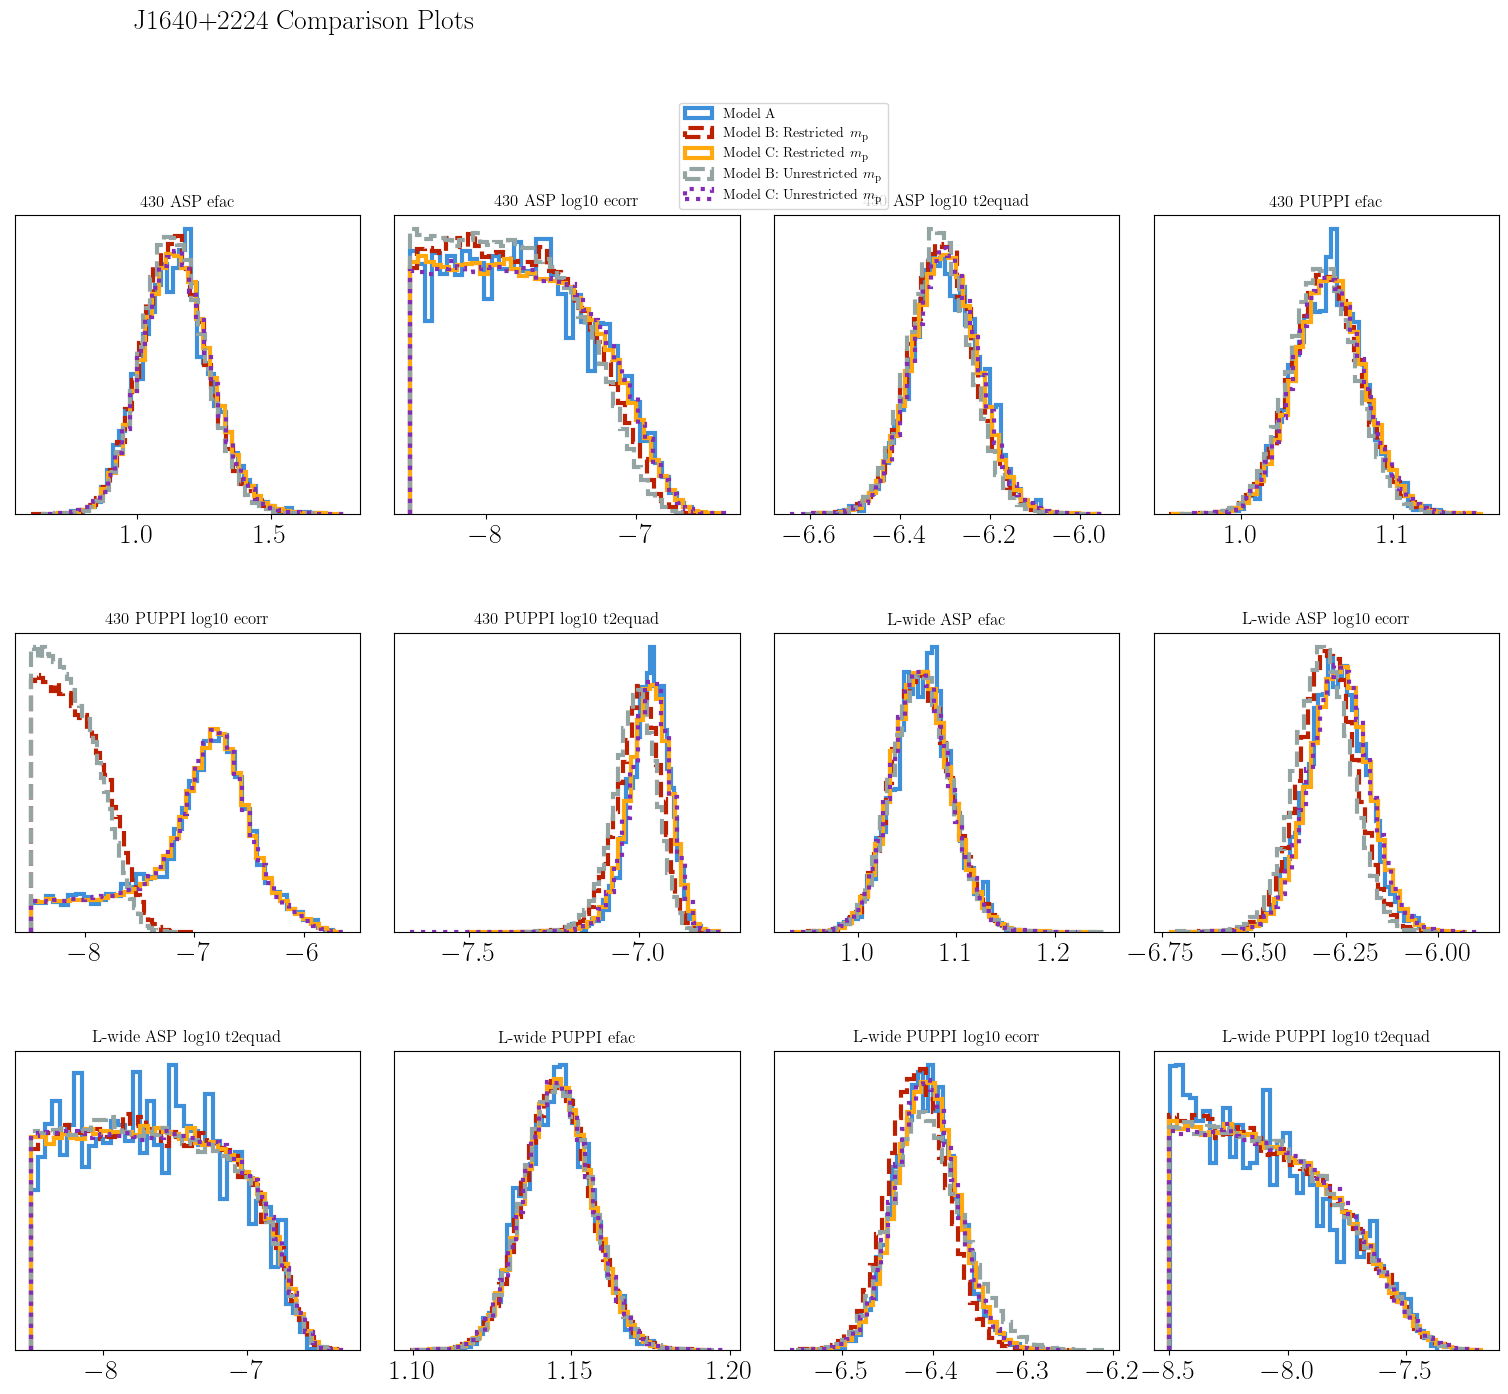

In [17]:
nltm.plot_all_param_overlap(psr_name,core_list_12p5yr,core_list_legend=core_list_legend_12p5yr,
                            par_sigma=plot_truths_12p5yr,
                            fig_kwargs={'suptitleloc':(.2,1.15),
                                        'suptitlefontsize':20,
                                        'legendloc':(.45,.85),
                                        'legendfontsize':10,},
                            linestyles=[linestyle_cycle[xx%2] for xx in range(4)]+[linestyle_cycle[(xx%2)+2] for xx in range(4)],
                           ncols=4,
                            real_tm_pars=True)

# Linear Coefficients

In [18]:
pta = lspv2.pta_setup(psr_12p5yr)
pta.param_names

['J1640+2224_430_ASP_efac',
 'J1640+2224_430_ASP_log10_ecorr',
 'J1640+2224_430_ASP_log10_t2equad',
 'J1640+2224_430_PUPPI_efac',
 'J1640+2224_430_PUPPI_log10_ecorr',
 'J1640+2224_430_PUPPI_log10_t2equad',
 'J1640+2224_L-wide_ASP_efac',
 'J1640+2224_L-wide_ASP_log10_ecorr',
 'J1640+2224_L-wide_ASP_log10_t2equad',
 'J1640+2224_L-wide_PUPPI_efac',
 'J1640+2224_L-wide_PUPPI_log10_ecorr',
 'J1640+2224_L-wide_PUPPI_log10_t2equad',
 'J1640+2224_red_noise_gamma',
 'J1640+2224_red_noise_log10_A']

In [19]:
idxs = np.argsort(core_12p5yr_ltm.get_param('lnlike',to_burn=False))[::-1][:500]

In [20]:
core_12p5yr_ltm.params

['J1640+2224_430_ASP_efac',
 'J1640+2224_430_ASP_log10_ecorr',
 'J1640+2224_430_ASP_log10_t2equad',
 'J1640+2224_430_PUPPI_efac',
 'J1640+2224_430_PUPPI_log10_ecorr',
 'J1640+2224_430_PUPPI_log10_t2equad',
 'J1640+2224_L-wide_ASP_efac',
 'J1640+2224_L-wide_ASP_log10_ecorr',
 'J1640+2224_L-wide_ASP_log10_t2equad',
 'J1640+2224_L-wide_PUPPI_efac',
 'J1640+2224_L-wide_PUPPI_log10_ecorr',
 'J1640+2224_L-wide_PUPPI_log10_t2equad',
 'J1640+2224_red_noise_gamma',
 'J1640+2224_red_noise_log10_A',
 'lnpost',
 'lnlike',
 'chain_accept',
 'pt_chain_accept']

In [21]:
coeffs = []
for idx in idxs:
    x0_dict = {}
    for p in pta.params:
        if "coefficients" in p.name:
            #x0_dict.update({p.name:np.random.randn(p.size)})
            print('not adding',p.name)
        else:
            x0_dict.update({p.name:core_12p5yr_ltm.get_param(p.name,to_burn=False)[idx]})
    coeffs.append(utils.get_coefficients(pta, x0_dict, variance=True))

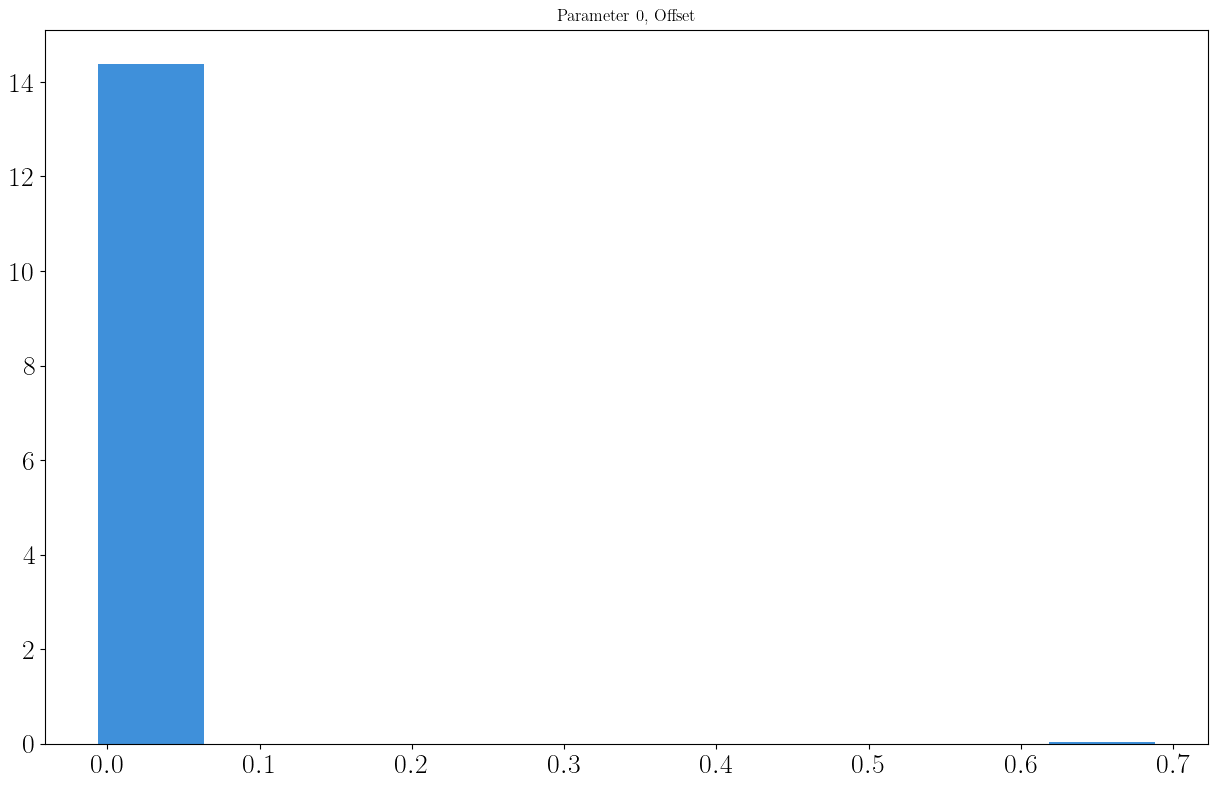

4.257506335489572 4.260586026777896


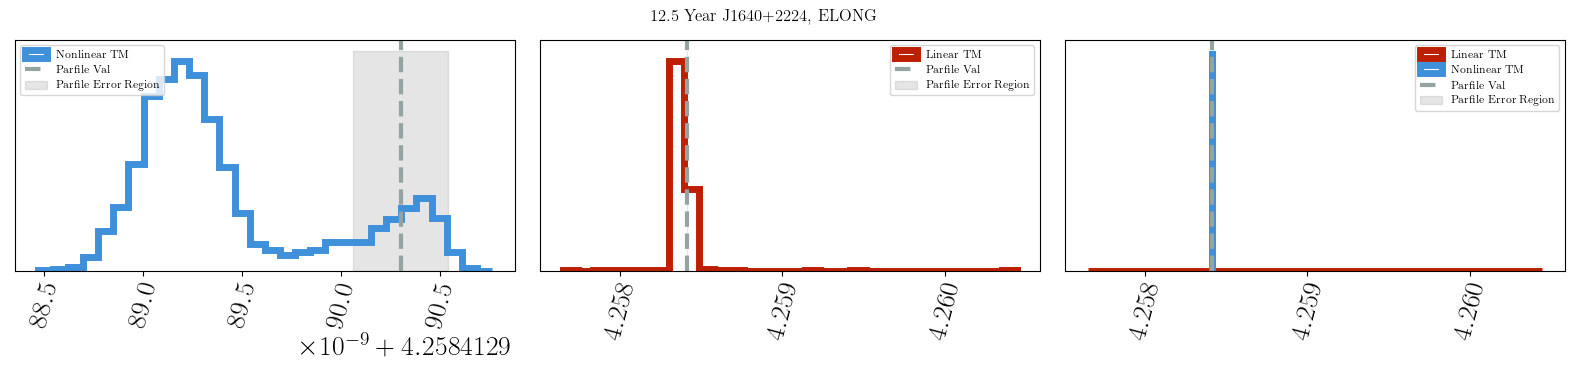

0.6746689128204867 0.7754396303109604


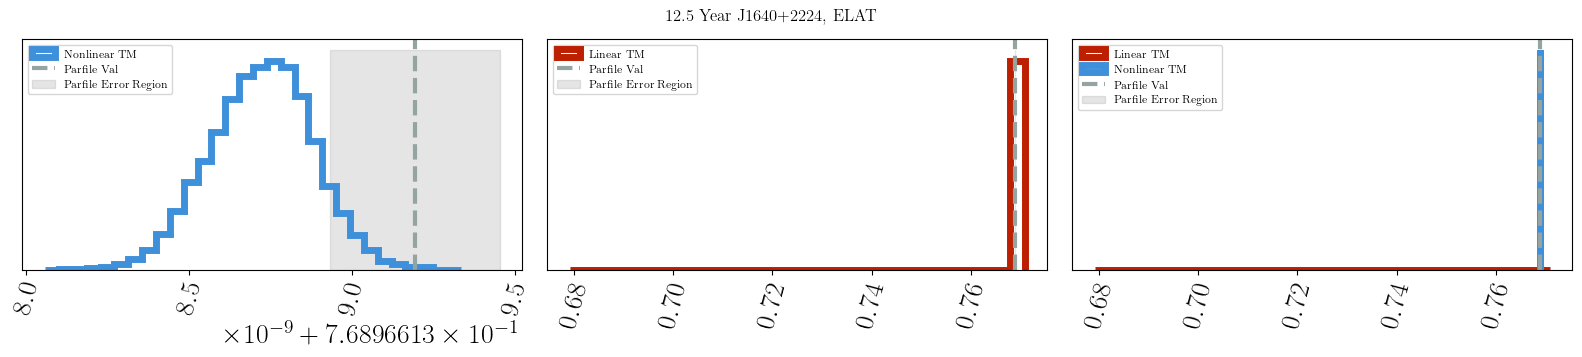

/Users/andrewkaiser/anaconda3/envs/enterprise_new/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


316.04500119548715 316.12880228454196


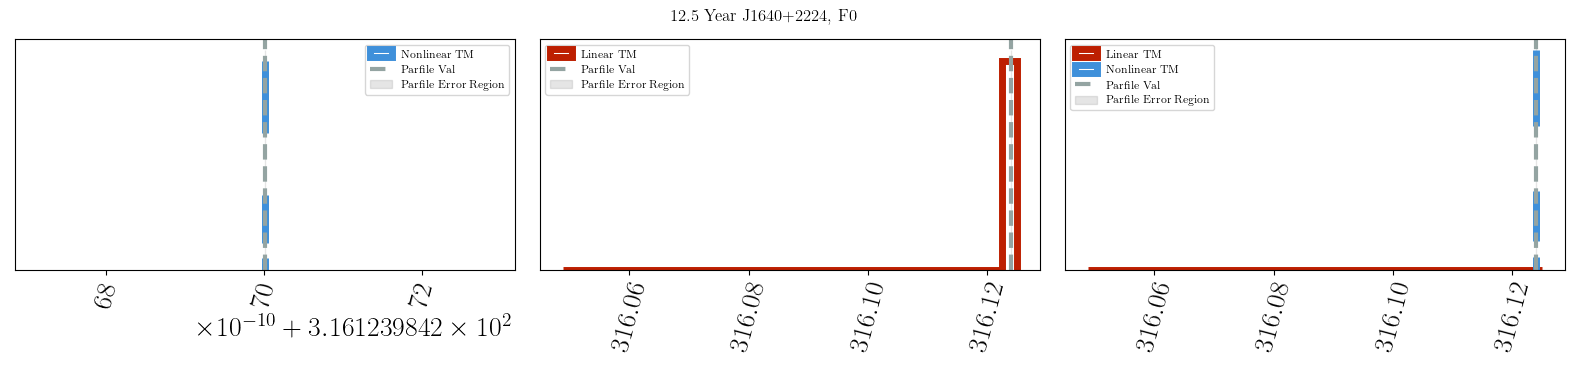

-0.003864408147419657 0.05434792371546052


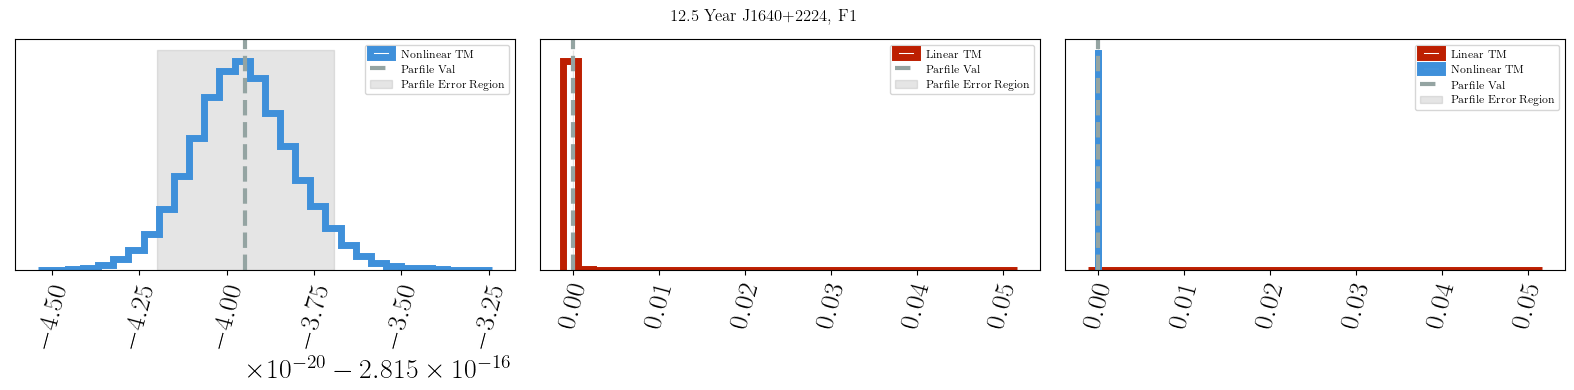

4.171363709734171 4.216664939907999


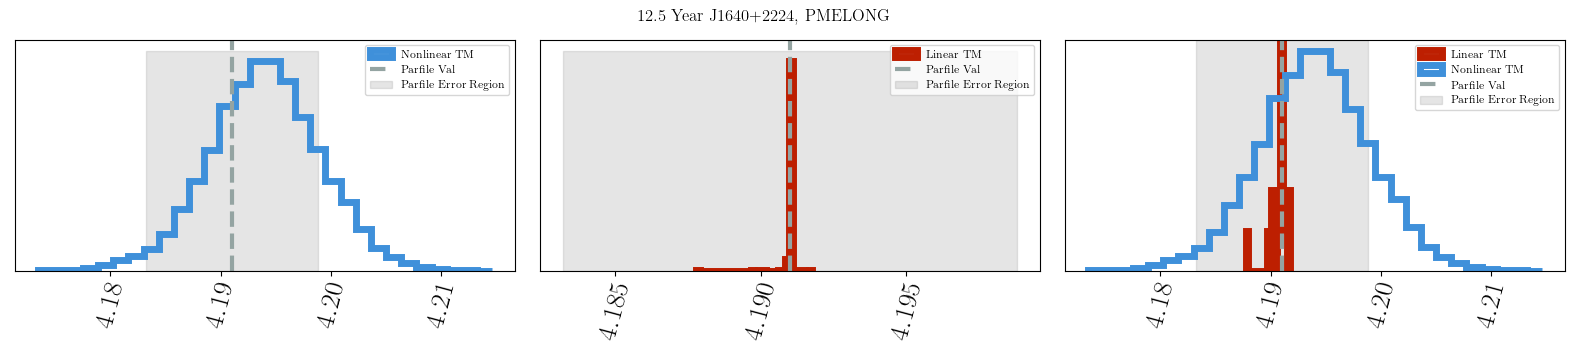

-10.761166849990602 -10.659465093388324


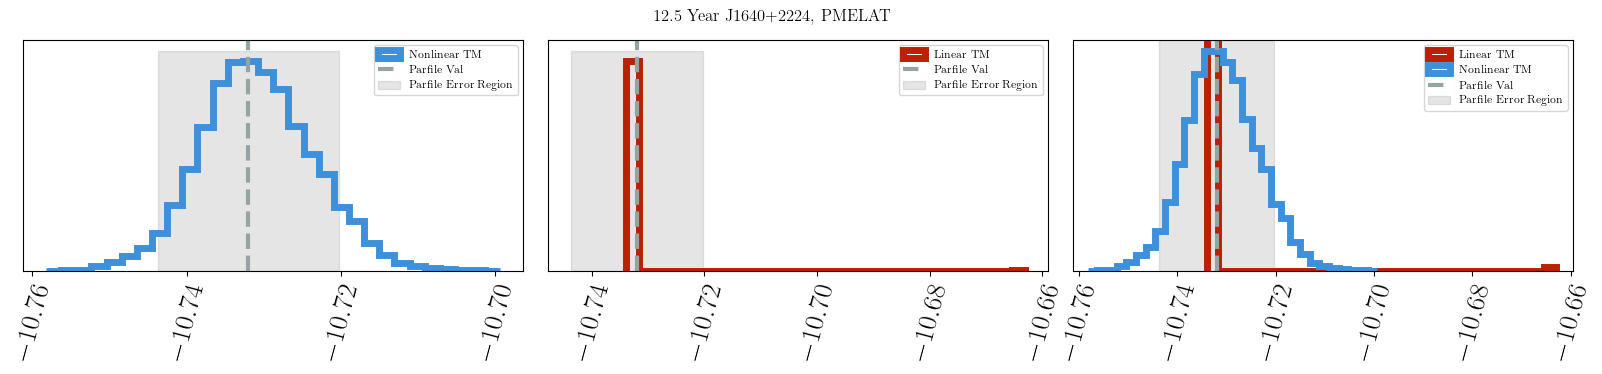

-0.3520605199551783 7.886712493112838


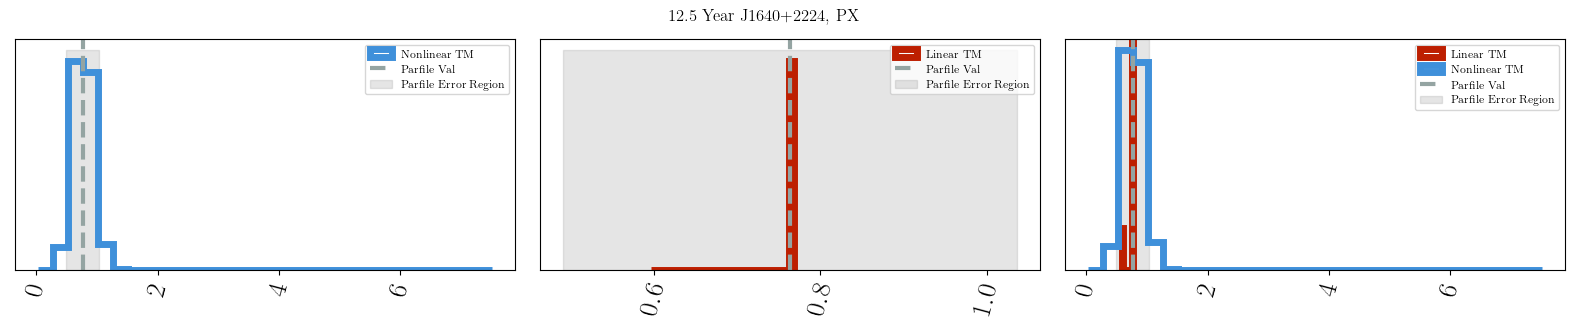

0.016437099235959256 0.5455673788154588


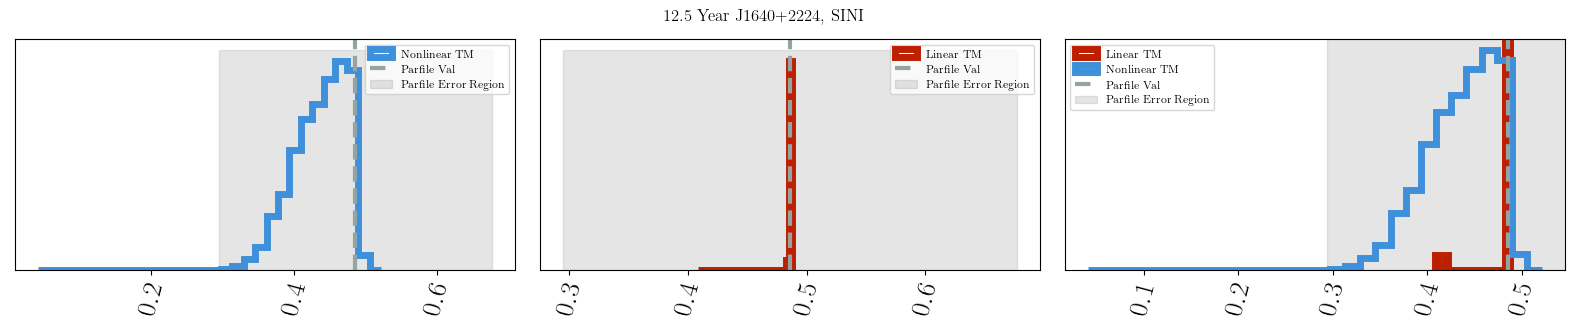

175.45622323422467 175.51619066079667


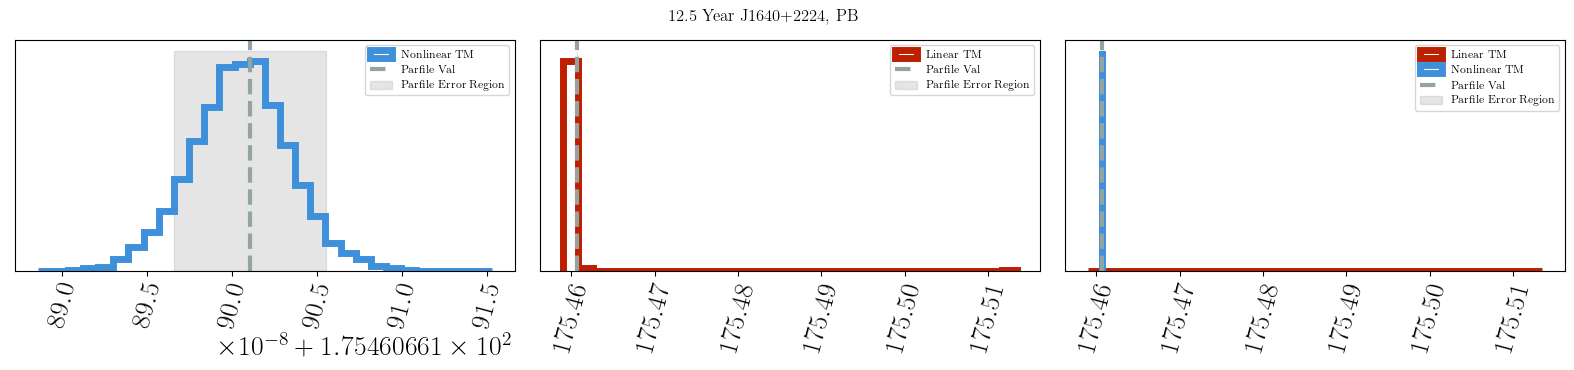

55661.63803975415 55662.27900974544


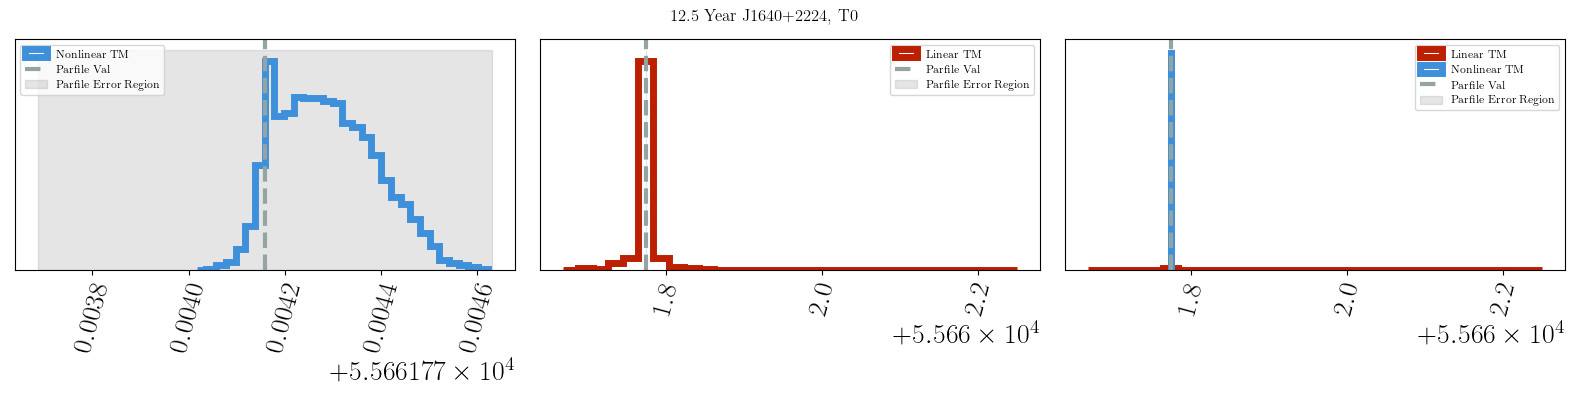

In [24]:
use_core = core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2
tm_params_orig = use_core.tm_pars_orig
for i,par in enumerate(psr_12p5yr.fitpars):
    plt_coeffs = []
    for coeff in coeffs:
        plt_coeffs.append(coeff[f"{psr_name}_linear_timing_model_coefficients"][i])
    if par == "Offset":
        plt.hist(plt_coeffs,density=True)
        plt.title(f"Parameter {i}, {par}")
    else:
        if par == "SINI":
            nltm_pararr = use_core.get_param(f"{psr_name}_timing_model_COSI",
                                                                    to_burn=False,tm_convert=True)
            truth_val = np.sqrt(1 - tm_params_orig[par][0]**2)
            truth_err = np.sqrt((np.abs(tm_params_orig[par][0] / truth_val)) ** 2 * tm_params_orig[par][1]**2)
            ltm_pararr = plt_coeffs+np.double(truth_val)
        else:
            nltm_pararr = use_core.get_param(f"{psr_name}_timing_model_{par}",
                                                                    to_burn=False,tm_convert=True)
            truth_val = tm_params_orig[par][0]
            truth_err = tm_params_orig[par][1]
            ltm_pararr = plt_coeffs+np.double(truth_val)
        
        fig,ax = plt.subplots(1,3,figsize=(20,3))
        ax[0].hist(nltm_pararr,density=True,histtype='step',color='C0',bins=30,linewidth=5.,label='Nonlinear TM')
        ax[0].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[0].set_yscale('log')
        
        ax[1].hist(ltm_pararr,density=True,histtype='step',color='C1',bins=30,linewidth=5.,label='Linear TM')
        ax[1].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[1].set_yscale('log')
        
        ax[2].hist(ltm_pararr,density=True,histtype='step',bins=30,linewidth=5.,color='C1',label='Linear TM')
        ax[2].hist(nltm_pararr,density=True,histtype='step',bins=30,linewidth=5.,color='C0',label='Nonlinear TM')
        ax[2].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[2].set_yscale('log')
        ax[2].set_ylim(ax[0].get_ylim())
        x_low = np.min([ax[0].get_xlim()[0],ax[1].get_xlim()[0]])
        x_high = np.max([ax[0].get_xlim()[1],ax[1].get_xlim()[1]])
        print(x_low,x_high)
        ax[2].set_xlim([x_low,x_high])
        #ax[2].set_xlim([np.double(truth_val)-np.double(truth_err),
        #               np.double(truth_val)+np.double(truth_err)])
        fill_space_x = np.linspace(np.double(truth_val) - np.double(truth_err),
                                   np.double(truth_val) + np.double(truth_err), 20)

        for axis in ax:
            axis.fill_between(
                fill_space_x, axis.get_ylim()[1], color="grey", alpha=0.2, label='Parfile Error Region'
            )
            axis.get_yaxis().set_visible(False)
            axis.legend(fontsize=8)
            axis.tick_params(axis='x', labelrotation = 75)
        plt.suptitle(f"12.5 Year {psr_name}, {par}")
        plt.subplots_adjust(wspace=.05)
    if i == 10:
        break
        pass
    #plt.savefig(f'{top_dir}/enterprise_timing/Figures/{psr_name}_nltm_vs_ltm_coeffs_{par}.png', dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
# !python ../nltm_ltm_J1640_v1.py --psr_name {psr_name} --datarelease "12p5yr" --run_num "ltm_v1" --no-tm_var --no-tm_linear --resume